# __Microsoft COCO dataset overview__

### __Deep Learning__

#### __Project: Image Captioning with Visual Attention__

In this _Jupyter Notebook_, I will present prepared for my project unprocessed data with target labels for captions and visual attention. Moreover, I will do basic Exploratory Data Analysis (EDA) and draw some conclusions about what kind of additional data preprocessing processes will be needed additionaly to currently assumed ones.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from PIL import Image

from scripts.data_utils import data_loader as dl
%load_ext autoreload
%autoreload 2

In [2]:
plt.rcParams["figure.figsize"] = (10, 10)

COCO_VALIDATION_PATHS = dl.CoCoTrainingDatasetPaths(
    images="../data/validation/val2017",
    captions_json="../data/validation/captions_val2017.json",
    segmentation_json="../data/validation/instances_val2017.json"
)

In [3]:
validation_dataset = dl.CoCoTrainingDataset(data_paths=COCO_VALIDATION_PATHS)

loading annotations into memory...
Done (t=0.07s)
creating index...
index created!
loading annotations into memory...
Done (t=0.74s)
creating index...
index created!


In [4]:
image, captions, segm_masks = validation_dataset[300]

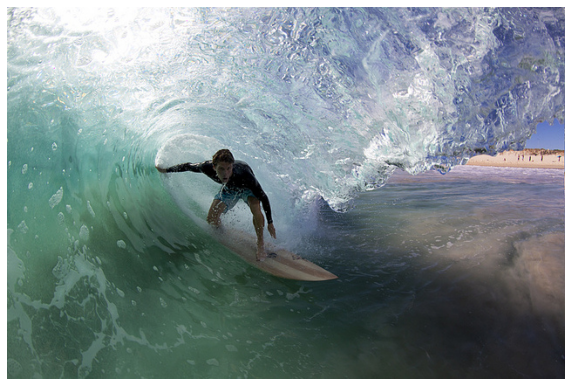

In [5]:
plt.axis("off")
plt.imshow(image)

In [6]:
captions

['A man riding a wave on top of a white surfboard.',
 'A photo inside and ocean wave looking at a person on a surfboard.',
 'A crashing wave is about to close in on a surfer.  ',
 'A man riding a wave on a surf board.',
 'A man on a surfboard inside a large wave.']

In [7]:
segm_masks.keys()

dict_keys(['person', 'surfboard'])

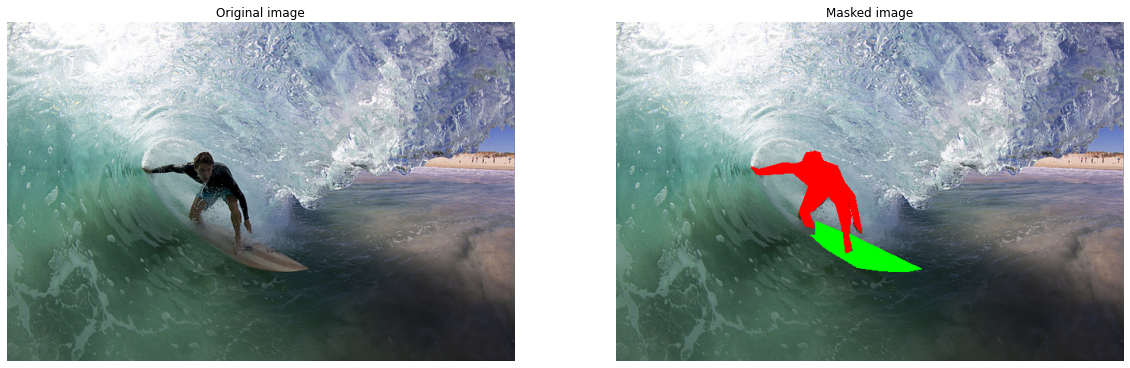

In [8]:
MASK_COLORS = [
    (255, 0, 0),
    (0, 255, 0),
    (0, 0, 255),
    (255, 255, 0),
    (255, 0, 255),
    (0, 255, 255),
    (255, 255, 255),
    (0, 150, 50),
    (50, 0, 50),
    (50, 50, 50),
    (0, 0, 0),
    (123, 123, 0),
    (123, 123, 123),
    (123, 10, 0),
]

masked_img = image.convert("RGB").copy()
colors_iter = iter(MASK_COLORS)

for object_category, masks in segm_masks.items():
    # Merge all masks for a given object category 
    object_masks = np.zeros(shape=(image.height, image.width))
    for mask in masks:
        object_masks += mask
    object_masks[object_masks > 0] = 255        

    # Apply current object mask to an image
    img_mask = Image.fromarray(np.int8(object_masks), mode='L')  
    color_img = Image.new("RGB", img_mask.size, next(colors_iter))

    masked_img = Image.composite(color_img, masked_img, img_mask)

# Plot original and masked images
fig, axis = plt.subplots(1, 2, figsize=(20, 10))

axis[0].set_title("Original image")
axis[0].axis('off')
axis[0].imshow(image)

axis[1].set_title("Masked image")
axis[1].axis('off')
axis[1].imshow(masked_img)